# Charter School Data Exploration | Sulayman Ali 🍎

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import missingno as msno
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objects as go

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%%javascript
//hack to fix export
require.config({
  paths: {
    d3: 'https://cdnjs.cloudflare.com/ajax/libs/d3/5.9.2/d3',
    jquery: 'https://code.jquery.com/jquery-3.4.1.min',
    plotly: 'https://cdn.plot.ly/plotly-latest.min'
  },

  shim: {
    plotly: {
      deps: ['d3', 'jquery'],
      exports: 'plotly'
    }
  }
});

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_excel("F_P_sample_data_set.xlsx",sheet_name = 0)
prof_levels = pd.read_excel("F_P_sample_data_set.xlsx",sheet_name = 2)

In [4]:
df.head()

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score
0,10000001,Bushwick Middle School,5,11.0,16.0
1,10000002,Bushwick Middle School,5,11.0,16.0
2,10000003,Crown Heights Middle School,5,11.0,16.0
3,10000004,Bushwick Middle School,5,11.0,16.0
4,10000005,Bushwick Middle School,5,11.0,14.0


In [5]:
df.shape

(376, 5)

## Data Prep & Cleaning:

In [6]:
def rename(row):
    """
    Ensures School Name is consistent across dataset
    """
    
    if "Bushwick" in row["School Name"]:
        return "Bushwick MS"
    else:
        return "Crown Heights MS"

def grade_level(row):
    """
    Ensures grade level is consistently entered across dataset
    """
    
    if type(row["Grade Level"]) == str:
        g = row["Grade Level"][0]
        return int(g)
    else:
        return int(row["Grade Level"])

def BOY_profficiency(row):
    """
    Code BOY Proficiency level based on data file
    """
    try:
        score = int(row["BOY F&P Score"])
    except:
        return None
    if row["Grade Level"] == 5:
        if  score <= 9:
            return "remedial"
        elif  score > 9 and score <= 11:
            return "below proficient"
        elif  score > 11 and score <=13:
            return "proficient"
        elif  score >= 14:
            return "advanced"
        else:
            return None
        
    elif row["Grade Level"] == 6:
        if  score <= 11:
            return "remedial"
        elif  score > 11 and score <=13:
            return "below proficient"
        elif  score > 13 and score <=15:
            return "proficient"
        elif  score >= 16:
            return "advanced"
        else:
            return None
    else:
        return None
    
def EOY_profficiency(row):
    """
    Code EOY Proficiency level based on data file
    """
    try:
        score = int(row["EOY F&P Score"])
    except:
        return None
    if row["Grade Level"] == 5:
        if  score <= 11:
            return "remedial"
        elif  score> 11 and score <=13:
            return "below proficient"
        elif  score > 13 and score <=15:
            return "proficient"
        elif  score >= 16:
            return "advanced"
        else:
            return None
        
    elif row["Grade Level"] == 6:
        if  score <= 13:
            return "remedial"
        elif  score > 13 and score <=15:
            return "below proficient"
        elif  score > 15 and score <=17:
            return "proficient"
        elif  score >= 18:
            return "advanced"
        else:
            return None
    else:
        return None
    
def f_p_change(row):
    """
    Compute change in proficiency BOY to EOY
    """
    try:
        return row["EOY F&P Score"] - row["BOY F&P Score"]
    except:
        return None
    
def f_p_change_percent(row):
    try:
        return 100 * (row["EOY F&P Score"]/row["BOY F&P Score"] - 1)
    except:
        return None

In [7]:
df['School Name'] = df.apply(rename, axis = 1)
df['Grade Level'] = df.apply(grade_level, axis = 1)
df['BOY Proficiency Level'] = df.apply(BOY_profficiency, axis = 1)
df['EOY Proficiency Level'] = df.apply(EOY_profficiency, axis = 1)
df['F&P Change'] = df.apply(f_p_change, axis = 1)
df['% F&P Change'] = df.apply(f_p_change_percent,axis = 1)

In [9]:
df['School Name'].value_counts()

Bushwick MS         202
Crown Heights MS    174
Name: School Name, dtype: int64

In [10]:
bushwick_df = df[df["School Name"] == "Bushwick MS"]
crownheights_df = df[df["School Name"] == "Crown Heights MS"]

In [11]:
bushwick_df['Grade Level'].value_counts()

6    105
5     97
Name: Grade Level, dtype: int64

## A look at missing data.

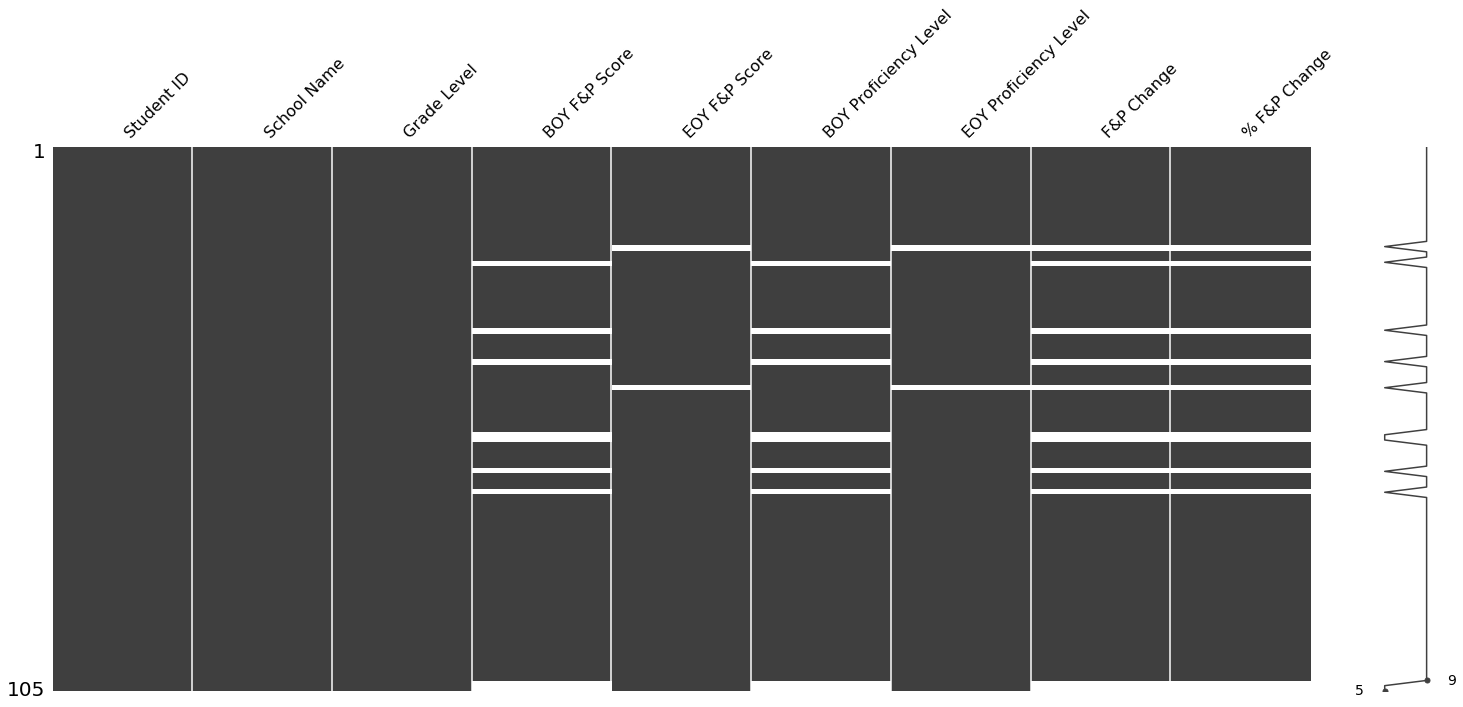

In [12]:
msno.matrix(bushwick_df[bushwick_df["Grade Level"] ==6])

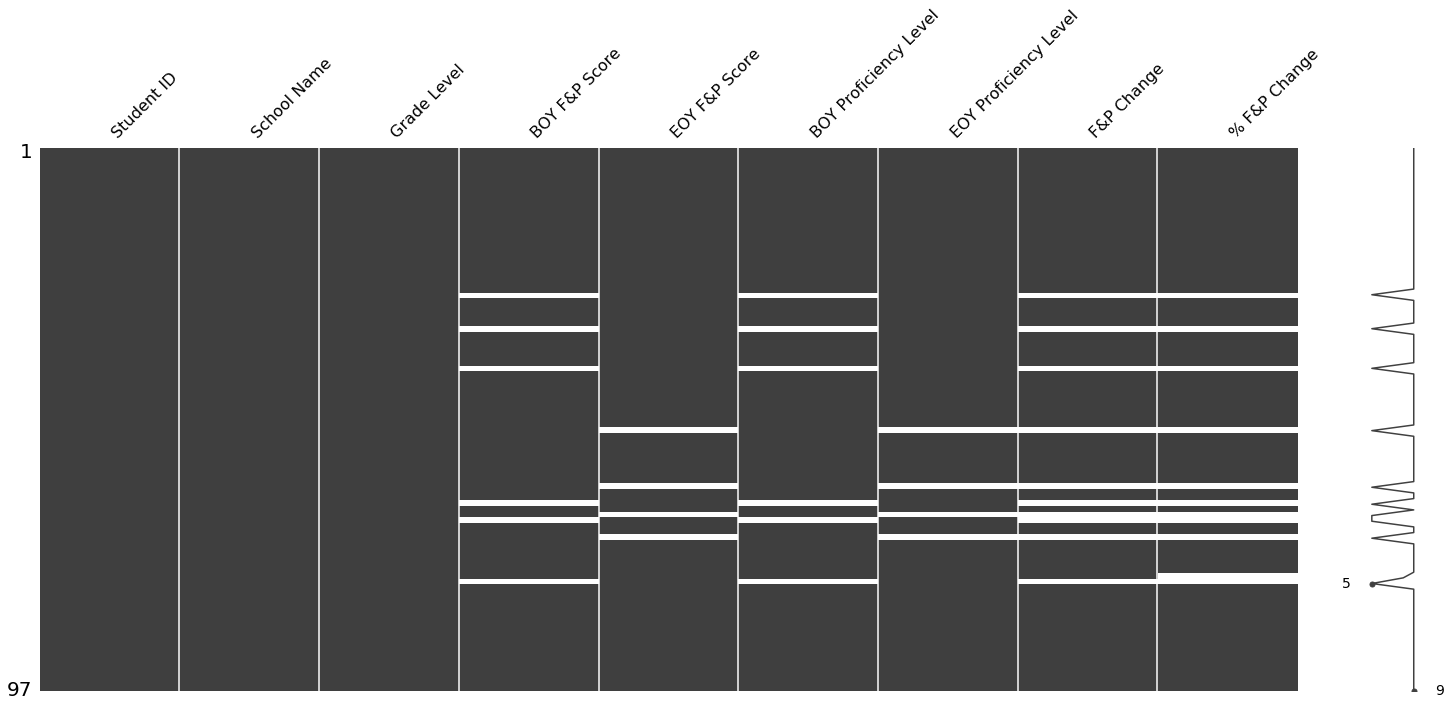

In [45]:
msno.matrix(bushwick_df[bushwick_df["Grade Level"] ==5])

In [46]:
crownheights_df['Grade Level'].value_counts()

6    94
5    80
Name: Grade Level, dtype: int64

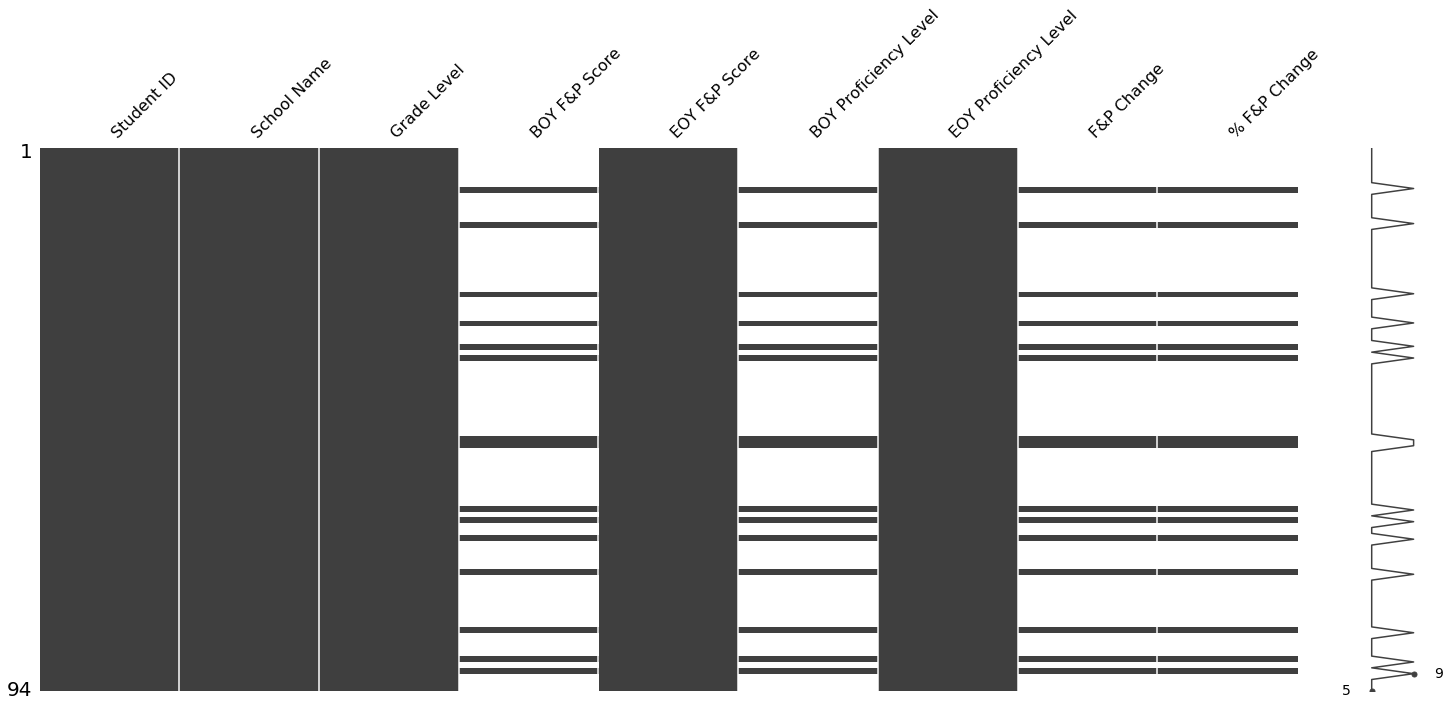

In [47]:
msno.matrix(crownheights_df[crownheights_df["Grade Level"] ==6])

Almost all data on Crown Heights 6th grader BOY F&P scores is missing, which makes drawing conclusions extremely difficult.

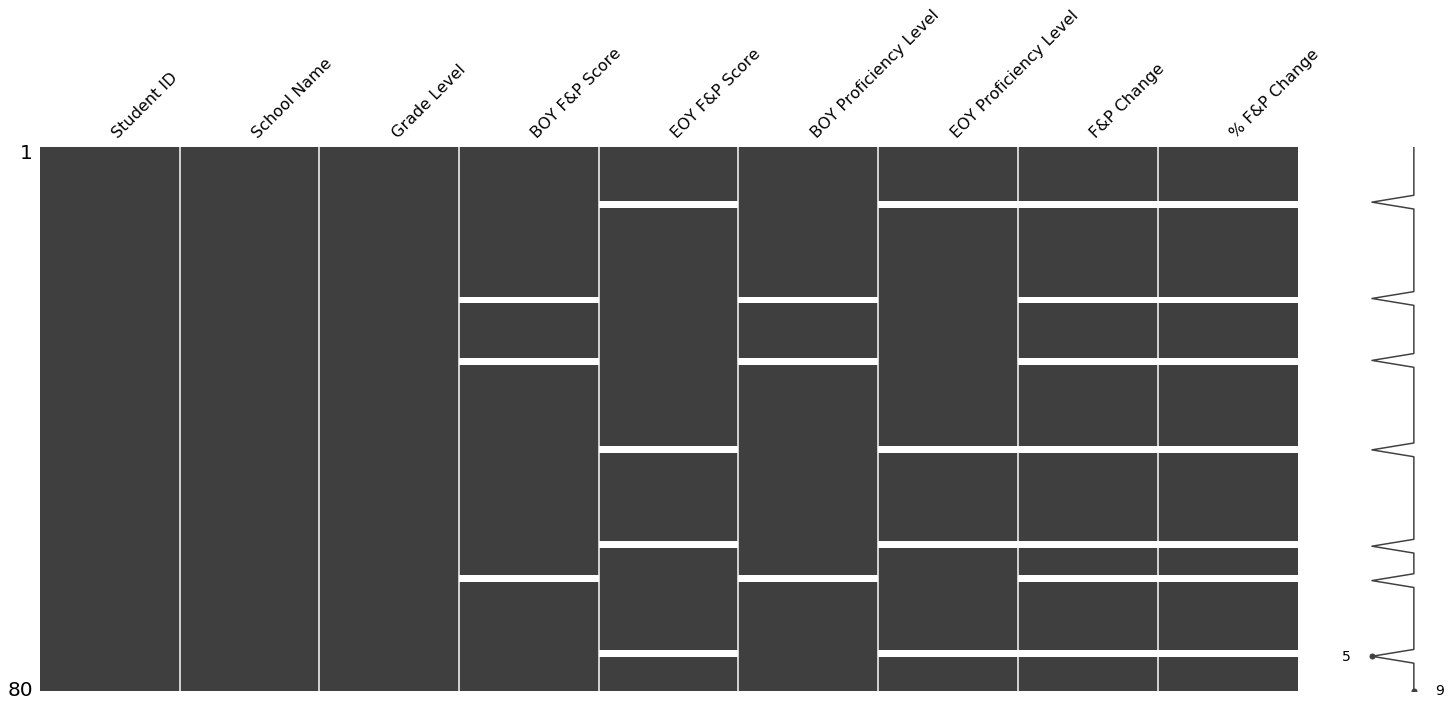

In [48]:
msno.matrix(crownheights_df[crownheights_df["Grade Level"] ==5])

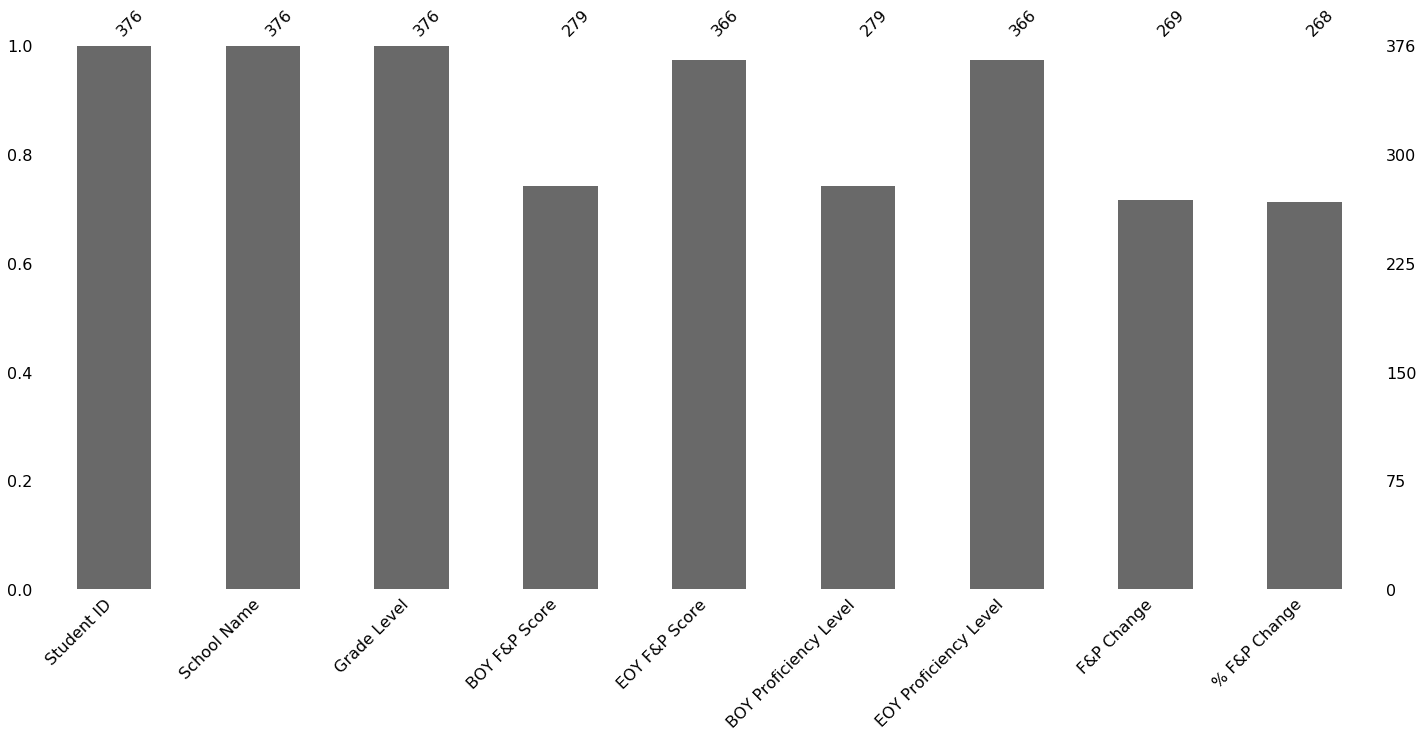

In [16]:
msno.bar(df)

In [20]:
df.corr()

,Student ID,Grade Level,BOY F&P Score,EOY F&P Score,F&P Change,% F&P Change
Student ID,1.000000,0.782386,0.323960,0.525207,0.199713,0.114743
Grade Level,0.782386,1.000000,0.455435,0.682034,0.236143,0.125400
BOY F&P Score,0.323960,0.455435,1.000000,0.412933,-0.476566,-0.586601
EOY F&P Score,0.525207,0.682034,0.412933,1.000000,0.603896,0.478920
F&P Change,0.199713,0.236143,-0.476566,0.603896,1.000000,0.962896
% F&P Change,0.114743,0.125400,-0.586601,0.478920,0.962896,1.000000


In [49]:
df.dtypes

Student ID                 int64
School Name               object
Grade Level                int64
BOY F&P Score            float64
EOY F&P Score            float64
BOY Proficiency Level     object
EOY Proficiency Level     object
F&P Change               float64
% F&P Change             float64
dtype: object

In [50]:
df.groupby(["School Name","Grade Level"]).mean()

Student ID  BOY F&P Score  EOY F&P Score  \
School Name      Grade Level                                               
Bushwick MS      5            1.000009e+07      10.868132      13.580645   
                 6            1.000026e+07      13.718750      17.854369   
Crown Heights MS 5            1.000011e+07      13.155844      14.828947   
                 6            1.000027e+07      18.066667      18.829787   

                              F&P Change  % F&P Change  
School Name      Grade Level                            
Bushwick MS      5              2.620690     26.916512  
                 6              4.138298     32.038822  
Crown Heights MS 5              1.739726     15.265967  
                 6              0.533333      4.426622

In [51]:
df["F&P Change"].value_counts()

 2.0     36
 4.0     33
 0.0     30
 1.0     29
 3.0     29
 5.0     28
 6.0     24
 7.0     16
-1.0     13
-3.0      8
 9.0      7
-2.0      7
 8.0      4
-5.0      3
 11.0     1
-4.0      1
Name: F&P Change, dtype: int64

In [52]:
df.shape

(376, 9)

In [53]:
df["BOY Proficiency Level"].value_counts()

proficient          96
below proficient    82
advanced            72
remedial            29
Name: BOY Proficiency Level, dtype: int64

In [54]:
df.groupby(["School Name","Grade Level"]).describe()

Student ID                                       \
                                  count          mean        std         min   
School Name      Grade Level                                                   
Bushwick MS      5                 97.0  1.000009e+07  67.290754  10000001.0   
                 6                105.0  1.000026e+07  71.517305  10000125.0   
Crown Heights MS 5                 80.0  1.000011e+07  63.124098  10000003.0   
                 6                 94.0  1.000027e+07  66.384762  10000131.0   

                                                                               \
                                      25%         50%         75%         max   
School Name      Grade Level                                                    
Bushwick MS      5            10000036.00  10000079.0  10000124.0  10000236.0   
                 6            10000208.00  10000271.0  10000327.0  10000373.0   
Crown Heights MS 5            10000055.75  10000099.0  10000148.0  10000239.0   
                 6            10000228.75  10000280.5  10000324.5  10000375.0   

                             BOY F&P Score             ... F&P Change        \
                                     count       mean  ...        75%   max   
School Name      Grade Level                           ...                    
Bushwick MS      5                    91.0  10.868132  ...        5.0  11.0   
                 6                    96.0  13.718750  ...        6.0   9.0   
Crown Heights MS 5                    77.0  13.155844  ...        4.0   9.0   
                 6                    15.0  18.066667  ...        1.5   7.0   

                             % F&P Change                                   \
                                    count       mean        std        min   
School Name      Grade Level                                                 
Bushwick MS      5                   86.0  26.916512  29.800272 -33.333333   
                 6                   94.0  32.038822  22.383648   0.000000   
Crown Heights MS 5                   73.0  15.265967  22.829243 -26.666667   
                 6                   15.0   4.426622  19.511392 -25.000000   

                                                                           
                                    25%        50%        75%         max  
School Name      Grade Level                                               
Bushwick MS      5             7.692308  25.000000  48.863636   87.500000  
                 6            14.285714  28.571429  45.329670  100.000000  
Crown Heights MS 5             0.000000   8.333333  28.571429   81.818182  
                 6            -5.882353   0.000000   8.660131   46.666667  

[4 rows x 40 columns]

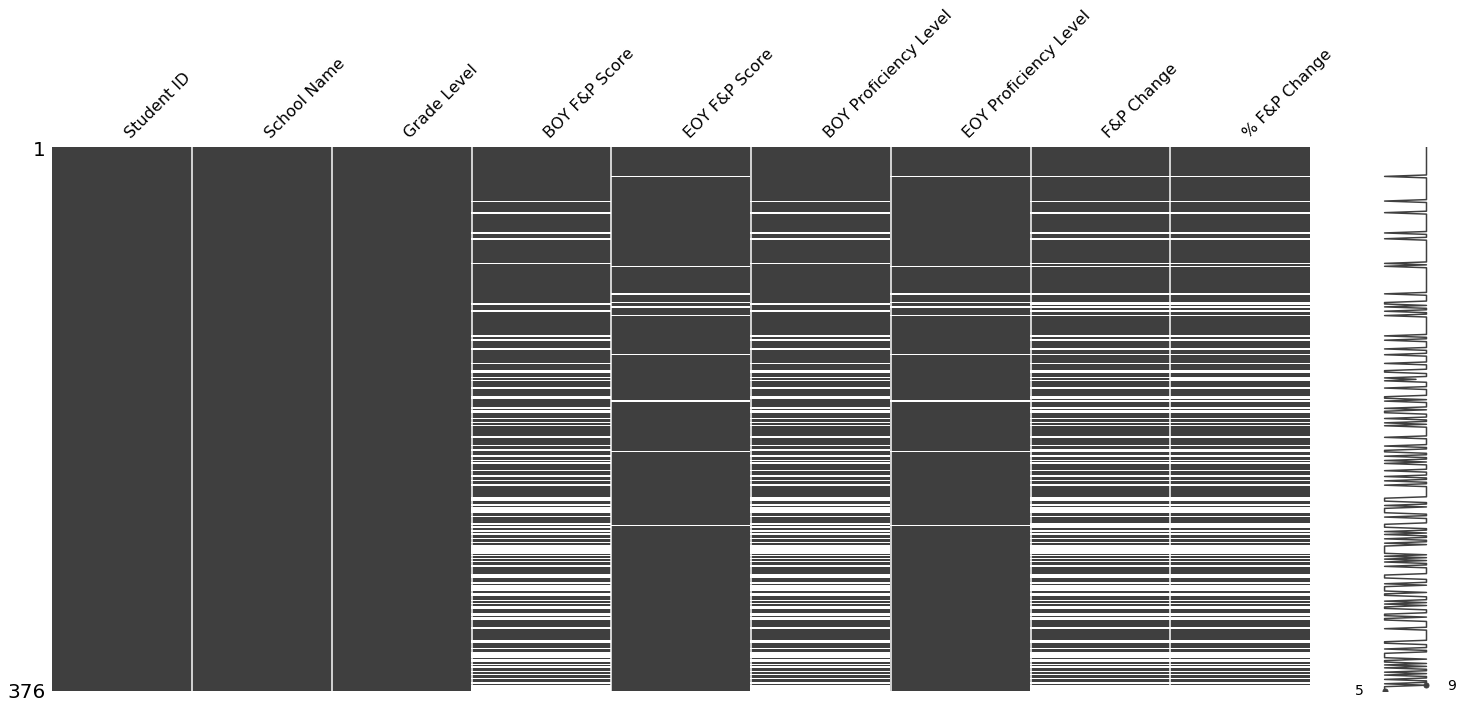

In [55]:
msno.matrix(df)

Visualization of missing data

## Tracking changes in reading level

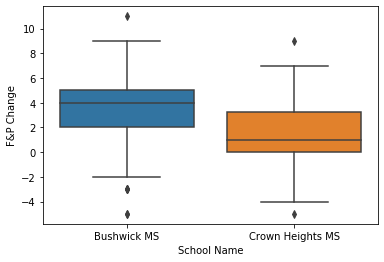

In [90]:
ax = sns.boxplot(x="School Name", y="F&P Change", data=df)


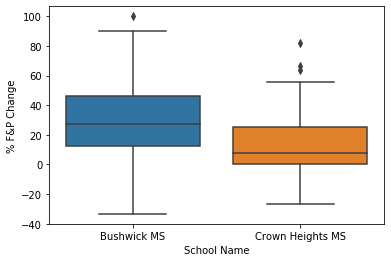

In [92]:
ax = sns.boxplot(x="School Name", y="% F&P Change", data=df)

In [98]:
df[df['F&P Change'] <0].sort_values("School Name").shape

(32, 9)

In [99]:
df[df['F&P Change'] <0]['School Name'].value_counts()

Crown Heights MS    19
Bushwick MS         13
Name: School Name, dtype: int64

In [100]:
df[df['F&P Change'] <0].groupby("School Name").mean()

,Student ID,Grade Level,BOY F&P Score,EOY F&P Score,F&P Change,% F&P Change
School Name,,,,,,
Bushwick MS,1.000009e+07,5.000000,13.000000,10.692308,-2.307692,-17.194056
Crown Heights MS,1.000014e+07,5.315789,15.789474,13.684211,-2.105263,-13.276319


In [95]:
df[df['F&P Change'] <0].groupby("School Name").describe()

Student ID                                                    \
                      count          mean         std         min         25%   
School Name                                                                     
Bushwick MS            13.0  1.000009e+07   72.699681  10000006.0  10000036.0   
Crown Heights MS       19.0  1.000014e+07  117.403413  10000009.0  10000054.5   

                                                     Grade Level            \
                         50%         75%         max       count      mean   
School Name                                                                  
Bushwick MS       10000077.0  10000115.0  10000235.0        13.0  5.000000   
Crown Heights MS  10000105.0  10000220.5  10000365.0        19.0  5.315789   

                  ... F&P Change      % F&P Change                       \
                  ...        75%  max        count       mean       std   
School Name       ...                                                     
Bushwick MS       ...       -1.0 -1.0         13.0 -17.194056  9.589055   
Crown Heights MS  ...       -1.0 -1.0         19.0 -13.276319  6.470568   

                                                                       
                        min        25%        50%       75%       max  
School Name                                                            
Bushwick MS      -33.333333 -25.000000 -16.666667 -9.090909 -6.666667  
Crown Heights MS -26.666667 -14.835165 -14.285714 -7.692308 -5.000000  

[2 rows x 48 columns]

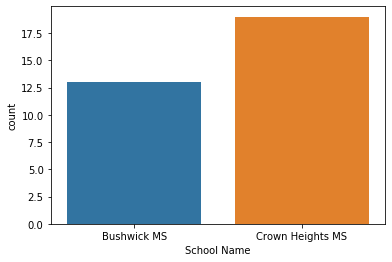

In [102]:
df[df['F&P Change'] <0]['School Name'].value_counts()
ax = sns.countplot(x="School Name", data=df[df['F&P Change'] <0])


## Creating a Slope Graph

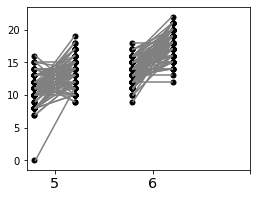

In [31]:
fig, ax = plt.subplots(figsize=(4, 3))
i = 1
for grade, subdf in bushwick_df.groupby("Grade Level"):
    b = subdf["BOY F&P Score"].values
    e = subdf["EOY F&P Score"].values
    
    x1 = i - 0.2
    x2 = i + 0.2
    
    for bi, ei in zip(b, e):
        ax.plot([x1, x2], [bi, ei], c='gray')

    # Plot the points
    ax.scatter(len(b)*[x1-0.01], b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(len(e)*[x2+0.01], e, c='k',
               s=25, label='EOY F&P Score')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels([5,6], fontsize='x-large')


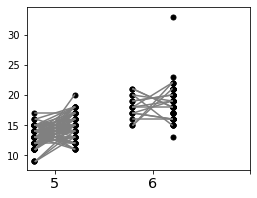

In [32]:
fig, ax = plt.subplots(figsize=(4, 3))
i = 1
for grade, subdf in crownheights_df.groupby("Grade Level"):
    b = subdf["BOY F&P Score"].values
    e = subdf["EOY F&P Score"].values
    
    x1 = i - 0.2
    x2 = i + 0.2
    
    for bi, ei in zip(b, e):
        ax.plot([x1, x2], [bi, ei], c='gray')

    # Plot the points
    ax.scatter(len(b)*[x1-0.01], b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(len(e)*[x2+0.01], e, c='k',
               s=25, label='EOY F&P Score')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels([5,6], fontsize='x-large')



In [33]:
slope_df = df.groupby(["School Name","Grade Level"]).mean()[["BOY F&P Score","EOY F&P Score"]].reset_index()

In [34]:
slope_df

,School Name,Grade Level,BOY F&P Score,EOY F&P Score
0,Bushwick MS,5,10.868132,13.580645
1,Bushwick MS,6,13.718750,17.854369
2,Crown Heights MS,5,13.155844,14.828947
3,Crown Heights MS,6,18.066667,18.829787


In [35]:
points = []
bushboy5 = slope_df.loc[0,"BOY F&P Score"]
busheoy5 = slope_df.loc[0,"EOY F&P Score"]
points.append((bushboy5,busheoy5))
bushboy6 = slope_df.loc[1,"BOY F&P Score"]
busheoy6 = slope_df.loc[1,"EOY F&P Score"]
points.append((bushboy6,busheoy6))
crownboy5 = slope_df.loc[2,"BOY F&P Score"]
crowneoy5 = slope_df.loc[2,"EOY F&P Score"]
points.append((crownboy5,crowneoy5))
crownboy6 = slope_df.loc[3,"BOY F&P Score"]
crpwneoy6 = slope_df.loc[3,"EOY F&P Score"]
points.append((crownboy6,crpwneoy6))

In [36]:
points

[(10.868131868131869, 13.580645161290322),
 (13.71875, 17.854368932038835),
 (13.155844155844155, 14.828947368421053),
 (18.066666666666666, 18.829787234042552)]

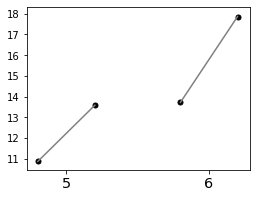

In [37]:
#BUSHWICK
fig, ax = plt.subplots(figsize=(4, 3))
i = 1
for tup in points[:2]:
    b = tup[0]
    e = tup[1]
    
    x1 = i - 0.2
    x2 = i + 0.2
    

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(x2, e, c='k',
               s=25, label='EOY F&P Score')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels([5,6], fontsize='x-large')




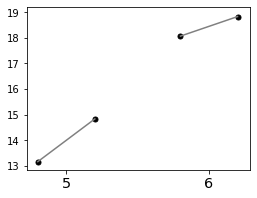

In [38]:
#Crown Heights
fig, ax = plt.subplots(figsize=(4, 3))
i = 1
for tup in points[2:]:
    b = tup[0]
    e = tup[1]
    
    x1 = i - 0.2
    x2 = i + 0.2
    

    ax.plot([x1, x2], [b, e], c='gray')

    # Plot the points
    ax.scatter(x1, b, c='k',
               s=25, label='BOY F&P Score')
    ax.scatter(x2, e, c='k',
               s=25, label='EOY F&P Score')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels([5,6], fontsize='x-large')





## tree map

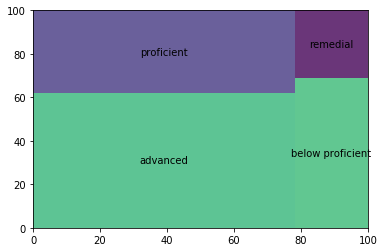

In [39]:
squarify.plot(sizes=df['EOY Proficiency Level'].value_counts(),
              label = ["advanced","proficient","below proficient", "remedial"], alpha=.8 )
plt.show()


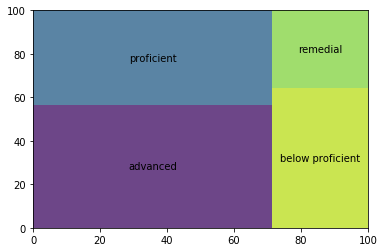

In [50]:
squarify.plot(sizes=bushwick_df['EOY Proficiency Level'].value_counts(),
              label = ["advanced","proficient","below proficient", "remedial"], alpha=.8 )
plt.show()



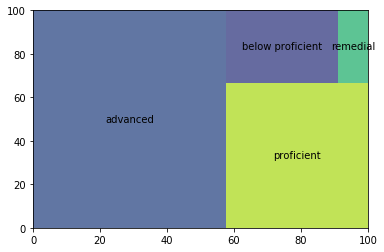

In [51]:
squarify.plot(sizes=crownheights_df['EOY Proficiency Level'].value_counts(),
              label = ["advanced","proficient","below proficient", "remedial"], alpha=.8 )
plt.show()



# Tracking Overall Proficiency 

### Both Schools Sankey

In [194]:
sankey_frame = df.groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame
source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)

In [197]:
# data
#label = ["ZERO", "ONE", "TWO", "THREE", "FOUR", "FIVE"]
label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#0271AC",
        "#fe1100","#fe875d","#aacfdd","#0271AC"]
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

### Overall Bushwick Sankey

In [71]:
#Bushwick Sankey
sankey_frame = bushwick_df.groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)


label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#356288",
        "#fe1100","#fe875d","#aacfdd","#356288"]
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            #color =  link_colors,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

### Bushwick 5th Grader Sankey

In [74]:
sankey_frame = bushwick_df[bushwick_df["Grade Level"] ==5].groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)


label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#FF9189","#DDAA97","#B3CBD4","#5C6E7E",
        "#FF9189","#DDAA97","#B3CBD4","#5C6E7E"]

#assigning red links to advanced drop offs
link_colors = []
for n in source_sankey:
    if n == 3:
        link_colors.append('rgba(255,0,0,0.5)')
    else:link_colors.append('rgba(192,192,192,0.3)')
        
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            color = link_colors,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

In [209]:
sankey_frame

,BOY Proficiency Level,EOY Proficiency Level,Student ID count,Student ID mean,Student ID std,Student ID min,Student ID 25%,Student ID 50%,Student ID 75%,Student ID max,...,F&P Change 75%,F&P Change max,% F&P Change count,% F&P Change mean,% F&P Change std,% F&P Change min,% F&P Change 25%,% F&P Change 50%,% F&P Change 75%,% F&P Change max
0,advanced,below proficient,1.0,1.000006e+07,NaN,10000061.0,10000061.00,10000061.0,10000061.00,10000061.0,...,-1.00,-1.0,1.0,-7.142857,NaN,-7.142857,-7.142857,-7.142857,-7.142857,-7.142857
1,advanced,proficient,5.0,1.000009e+07,72.785301,10000014.0,10000041.00,10000072.0,10000096.00,10000203.0,...,0.00,0.0,5.0,-1.333333,2.981424,-6.666667,0.000000,0.000000,0.000000,0.000000
2,advanced,remedial,4.0,1.000007e+07,65.398140,10000020.0,10000032.00,10000056.5,10000099.25,10000166.0,...,-3.00,-3.0,4.0,-26.860119,6.329217,-33.333333,-31.770833,-26.339286,-21.428571,-21.428571
3,below proficient,advanced,11.0,1.000006e+07,58.693038,10000001.0,10000008.00,10000033.0,10000085.50,10000164.0,...,7.00,8.0,11.0,55.785124,13.337778,45.454545,45.454545,45.454545,66.818182,80.000000
4,below proficient,below proficient,9.0,1.000017e+07,69.158835,10000042.0,10000127.00,10000195.0,10000229.00,10000236.0,...,3.00,3.0,9.0,23.030303,7.413412,9.090909,20.000000,20.000000,30.000000,30.000000
5,below proficient,proficient,11.0,1.000009e+07,72.493260,10000005.0,10000035.50,10000087.0,10000121.00,10000225.0,...,4.50,5.0,11.0,39.421488,8.123761,27.272727,36.363636,40.000000,45.000000,50.000000
6,below proficient,remedial,7.0,1.000006e+07,41.220661,10000006.0,10000023.50,10000063.0,10000088.00,10000115.0,...,0.50,1.0,7.0,-1.038961,8.567164,-9.090909,-9.090909,0.000000,5.000000,10.000000
7,proficient,advanced,2.0,1.000007e+07,7.071068,10000068.0,10000070.50,10000073.0,10000075.50,10000078.0,...,4.50,5.0,2.0,32.371795,13.144934,23.076923,27.724359,32.371795,37.019231,41.666667
8,proficient,below proficient,5.0,1.000008e+07,80.250857,10000035.0,10000037.00,10000039.0,10000073.00,10000222.0,...,1.00,1.0,5.0,5.000000,4.564355,0.000000,0.000000,8.333333,8.333333,8.333333
9,proficient,proficient,11.0,1.000007e+07,51.492453,10000016.0,10000030.00,10000040.0,10000091.00,10000182.0,...,2.00,3.0,11.0,15.209790,4.641051,7.692308,15.384615,15.384615,16.666667,25.000000


### Bushwick 6th Grader Sankey

In [206]:
sankey_frame = bushwick_df[bushwick_df["Grade Level"] ==6].groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)

# data
#label = ["ZERO", "ONE", "TWO", "THREE", "FOUR", "FIVE"]
label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#356288",
        "#fe1100","#fe875d","#aacfdd","#356288"]
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

### Crown Heights overall Sankey

In [199]:
sankey_frame = crownheights_df.groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)

# data
#label = ["ZERO", "ONE", "TWO", "THREE", "FOUR", "FIVE"]
label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#356288",
        "#fe1100","#fe875d","#aacfdd","#356288"]
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

### Crown Heights 5th graders Sankey

In [75]:
sankey_frame = crownheights_df[crownheights_df["Grade Level"] == 5].groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)


label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#356288",
        "#fe1100","#fe875d","#aacfdd","#356288"]
link_colors = []
for n in source_sankey:
    if n == 3:
        link_colors.append('rgba(255,0,0,0.5)')
    else:link_colors.append('rgba(192,192,192,0.3)')
        
# data to dict, dict to sankey
link = dict(source = source_sankey,
            target = target_sankey,
            color = link_colors,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

In [76]:
link

{'source': [3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 0, 0],
 'target': [7, 5, 6, 4, 7, 6, 7, 5, 6, 4, 5, 6],
 'color': ['rgba(255,0,0,0.5)',
  'rgba(255,0,0,0.5)',
  'rgba(255,0,0,0.5)',
  'rgba(255,0,0,0.5)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)',
  'rgba(192,192,192,0.3)'],
 'value': [10.0, 5.0, 15.0, 2.0, 7.0, 1.0, 9.0, 9.0, 11.0, 1.0, 1.0, 2.0]}

In [211]:
#Crown Heights 6th Sankey
sankey_frame = crownheights_df[crownheights_df["Grade Level"] == 6].groupby(["BOY Proficiency Level","EOY Proficiency Level"]).describe().reset_index()
sankey_frame.columns = [' '.join(col).strip() for col in sankey_frame.columns.values]
sankey_frame

source_sankey = []
for item in sankey_frame["BOY Proficiency Level"]:
    if item == "remedial":
        source_sankey.append(0)
    if item == "below proficient":
        source_sankey.append(1)
    if item == "proficient":
        source_sankey.append(2)
    if item == "advanced":
        source_sankey.append(3)

target_sankey = []
for item in sankey_frame["EOY Proficiency Level"]:
    if item == "remedial":
        target_sankey.append(4)
    if item == "below proficient":
        target_sankey.append(5)
    if item == "proficient":
        target_sankey.append(6)
    if item == "advanced":
        target_sankey.append(7)


label = ["remedial", "below proficient", "proficient", "advanced",
        "remedial", "below proficient", "proficient", "advanced",]
c = ["#fe1100","#fe875d","#aacfdd","#356288",
        "#fe1100","#fe875d","#aacfdd","#356288"]
link = dict(source = source_sankey,
            target = target_sankey,
            value = list(sankey_frame["Student ID count"].values))
node = dict(label = label, pad=5, thickness=10,
           color =  c)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

## Violin Plots

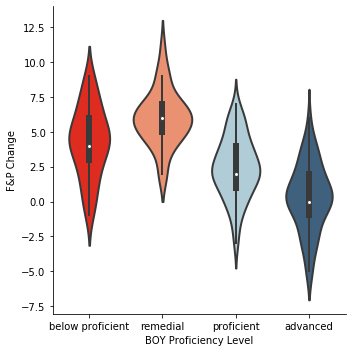

In [150]:
colors = ["#fe1100","#fe875d","#aacfdd","#356288"]
#colors = ["#aacfdd","#356288","#fe1100","#fe875d"]
#fig, ax = pyplot.subplots(figsize=(10,5))


# Set custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.catplot(x="BOY Proficiency Level", y="F&P Change",
#                split=True, inner="quart",hue="School Name",
                linewidth=2,
               data=df, kind="violin")

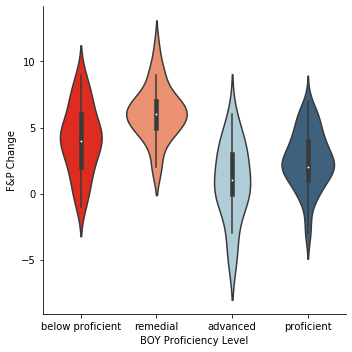

In [84]:
colors = ["#fe1100","#fe875d","#aacfdd","#356288"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.catplot(x="BOY Proficiency Level", y="F&P Change",
               data=bushwick_df, kind="violin")

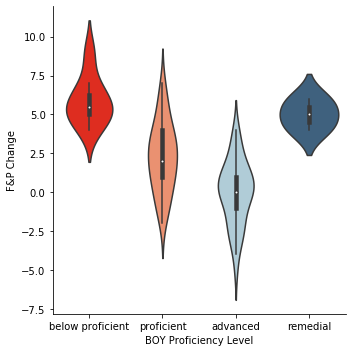

In [85]:
colors = ["#fe1100","#fe875d","#aacfdd","#356288"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.catplot(x="BOY Proficiency Level", y="F&P Change",
               data=crownheights_df, kind="violin")

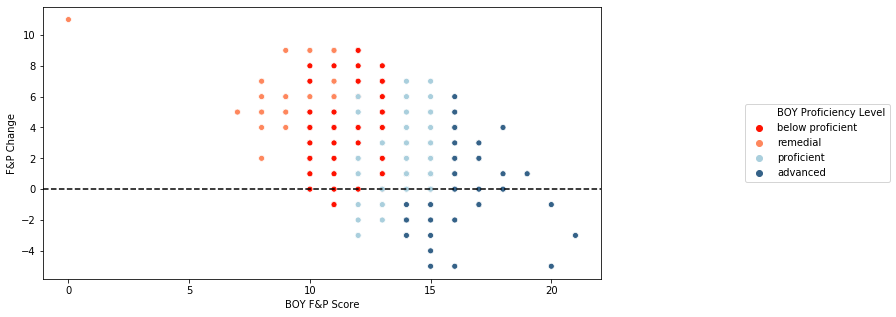

In [152]:
fig, ax = pyplot.subplots(figsize=(10,5))
g = sns.scatterplot(x="BOY F&P Score", y="F&P Change", hue="BOY Proficiency Level",data = df)
#ax1, ax2 = g.axes[0]
g.axhline(0, ls='--', color = 'black')
#g.axhspan(-5, 0, facecolor='0.5', alpha=0.25)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

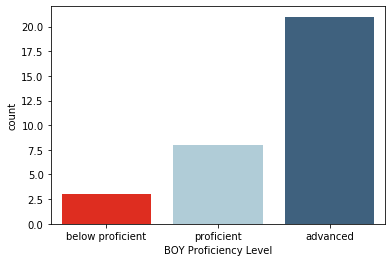

In [155]:
colors = ["#fe1100","#aacfdd","#356288"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(x = "BOY Proficiency Level", data= df[df['F&P Change'] < 0])

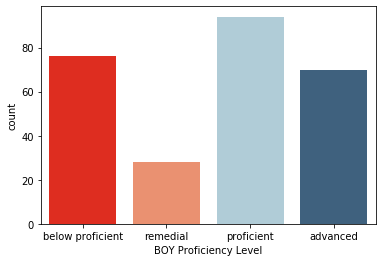

In [161]:
colors = ["#fe1100","#fe875d","#aacfdd","#356288"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(x = "BOY Proficiency Level", data= df.dropna())

In [160]:
df.dropna().groupby("BOY Proficiency Level").describe()

Student ID                                        \
                           count          mean         std         min   
BOY Proficiency Level                                                    
advanced                    70.0  1.000016e+07   99.536242  10000010.0   
below proficient            76.0  1.000016e+07  110.889476  10000001.0   
proficient                  94.0  1.000018e+07  111.517455  10000008.0   
remedial                    28.0  1.000016e+07  103.137244  10000007.0   

                                                                         \
                               25%         50%          75%         max   
BOY Proficiency Level                                                     
advanced               10000081.50  10000148.5  10000241.25  10000369.0   
below proficient       10000056.75  10000151.0  10000231.50  10000360.0   
proficient             10000073.25  10000167.5  10000278.75  10000368.0   
remedial               10000095.50  10000131.5  10000240.00  10000371.0   

                      Grade Level            ... F&P Change      % F&P Change  \
                            count      mean  ...        75%  max        count   
BOY Proficiency Level                        ...                                
advanced                     70.0  5.400000  ...        2.0  6.0         70.0   
below proficient             76.0  5.394737  ...        6.0  9.0         76.0   
proficient                   94.0  5.446809  ...        4.0  7.0         94.0   
remedial                     28.0  5.321429  ...        7.0  9.0         28.0   

                                                                              \
                            mean        std        min        25%        50%   
BOY Proficiency Level                                                          
advanced                2.038348  15.225639 -33.333333  -6.470588   0.000000   
below proficient       37.645841  22.094788  -9.090909  25.000000  39.230769   
proficient             17.970150  16.254543 -25.000000   8.333333  16.666667   
remedial               64.797207  17.148963  25.000000  55.555556  63.636364   

                                              
                             75%         max  
BOY Proficiency Level                         
advanced               12.316176   37.500000  
below proficient       50.961538   81.818182  
proficient             28.571429   50.000000  
remedial               75.000000  100.000000  

[4 rows x 48 columns]

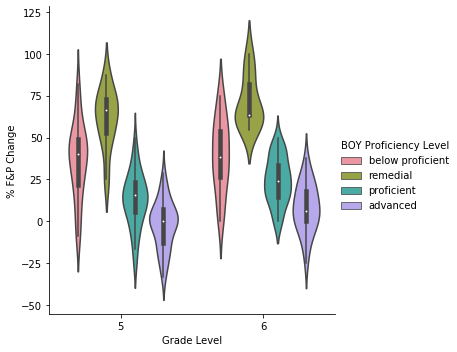

In [166]:
colors = ["#fe1100","#356288"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.catplot(x="Grade Level", y="% F&P Change", hue = "BOY Proficiency Level",
               data=df, kind="violin")

## Conclusions

After completing the data analysis, I began to revisit the research questions that guided
me through the process.

1. How are the middle schools doing in reading?
2. How does performance compare across the two schools and grades? 3. Are the schools on track to closing the achievement gap?

The answer to these questions are not as clear as I initially thought they would’ve been. It’s true that the overall trend for students covered in the dataset shows that the distribution of students at proficient and advanced reading levels is greater at E.O.Y. than B.O.Y., indicating achievement in reading gains. But, further analysis showed that this wasn’t the case for all students. I believe that the students are on the path towards proficiency and beyond, but specific problems at each school need to be addressed to make sure that no student is left behind. Declines in proficiency make it clear that the needs of 5th graders who start the school year at a proficient or advanced level are not being met. This is especially true at Bushwick Middle School, where all 5th grade advanced readers saw a decline in proficiency. Though more data on Crown Heights students’ needs to be collected to fill in missing values, 6th graders seem to be performing exceptionally, with a vast majority of advanced and proficient levels being achieved as well as great gains overall. Across all demographics, we see mostly advancement in proficiency level for students who begin at remedial and below proficient levels, indicating that the schools in question are on track to close the achievement gap for these students. However, achievement retention is important as well, and we must not let these gains distract from any losses in proficiency experienced by students who may begin school at higher reading levels